<br>

# `Fourier Transormation:`

<br>

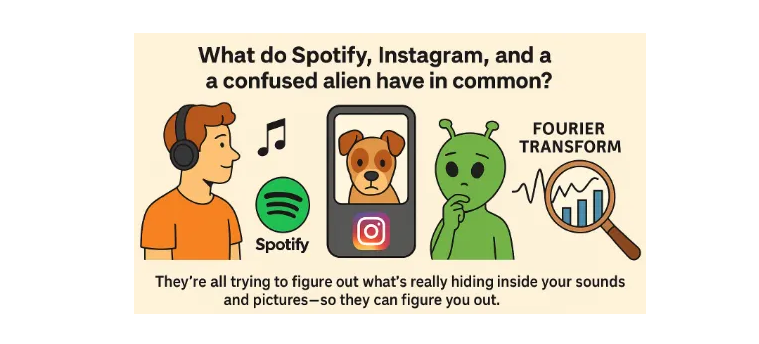

In [2]:
from IPython.display import Image
Image("../../img/img10.png")


# Math for ML: Fourier Transform Explained Simply with ML Examples.

What do Spotify, Instagram, and a confused alien have in common?
They’re all trying to figure out **what’s hiding inside your sounds and pictures** so that they can figure you out.

Whether it’s matching a melody to your favorite playlist, sharpening a blurry photo of your lunch, or analyzing the way you talk, these systems don’t rely on magic. Believe it or not, it’s all powered by math, and one of the most powerful tools in the toolbox is the **Fourier Transform.** 

The Fourier Transform takes messy, real-world signals and breaks them down into their basic ingredients, like turning a symphony into a sheet of notes. From music and images to modern machine learning models, this mathematical technique reveals the hidden frequencies that make everything tick.

<br>

## Frequency: Understanding the Basics

Imagine throwing different-sized pebbles into a calm lake. Each pebble creates ripples — waves with specific patterns. Similarly, any complex signal (such as audio or an image) can be broken down into simpler waves of varying frequencies.

- **Audio:** Frequencies correspond to pitches (low bass, high treble).
- **Images:** Frequencies represent textures or patterns (smooth gradients vs sharp edges).

<br>

## Waves: Fundamental Properties

Waves are disturbances that transfer energy from one point to another through oscillations. They are characterized by:

- **Amplitude:** Height of the wave, determining the strength or intensity.
- **Frequency:**  How often the wave repeats per second, measured in Hertz (Hz).
- **Period:** The time it takes for one complete cycle to occur.
- **Phase:** The position of a point within the wave cycle at a specific time.

**In audio, amplitude affects loudness, while frequency affects pitch. In images, amplitude corresponds to contrast, and frequency relates to the detail level.**

<br>

## Python Illustration of Wave Properties:
Here’s a simple Python example clearly illustrating these wave properties:


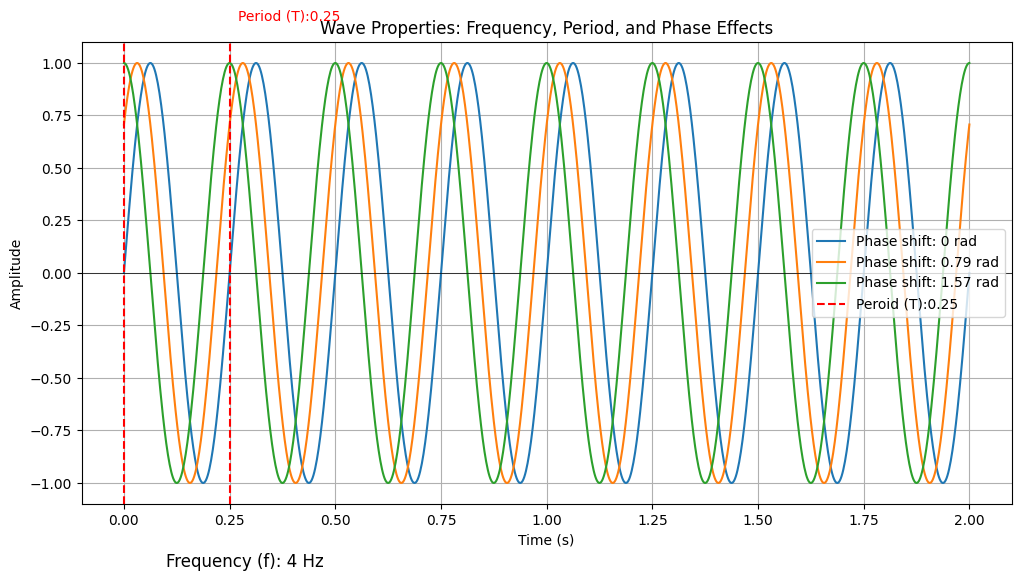

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Wave parameters
amplitude = 1
# Frequency in Hz
frequency = 4 
# Period is inverse of frequency
period = 1 / frequency  
# Different phase shifts for comparison,[0,45,90 degree]
phase_shifts = [0, np.pi / 4, np.pi / 2]  
time = np.linspace(0, 2, 1000)


# Plot waves with different phases
plt.figure(figsize=(12, 6))
for phase in phase_shifts:
    # formula of wave, y = A sin(2*pi*f*t+phase)
    wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)
    plt.plot(time, wave, label=f'Phase shift: {np.round(phase, 2)} rad')



# Annotate period
plt.axvline(x=period, color='red', linestyle='--', lw=1.5, label=f'Peroid (T):{period}')
plt.axvline(x=0, color='red', linestyle='--', lw=1.5)
plt.text(period + 0.02, amplitude * 1.2, f'Period (T):{period}', color='red')


# Frequency annotation
plt.text(0.1, -amplitude * 1.4, f'Frequency (f): {frequency} Hz', fontsize=12)

# Plot formatting
plt.axhline(y=0, color='black', lw=0.5)
plt.title('Wave Properties: Frequency, Period, and Phase Effects')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In this example, the wave consists of a single sine wave with a single frequency. However, this is a simple wave. The waves primarily consist of many waves with different frequencies and amplitudes combined. a figue given below where we multiplex two or more waves


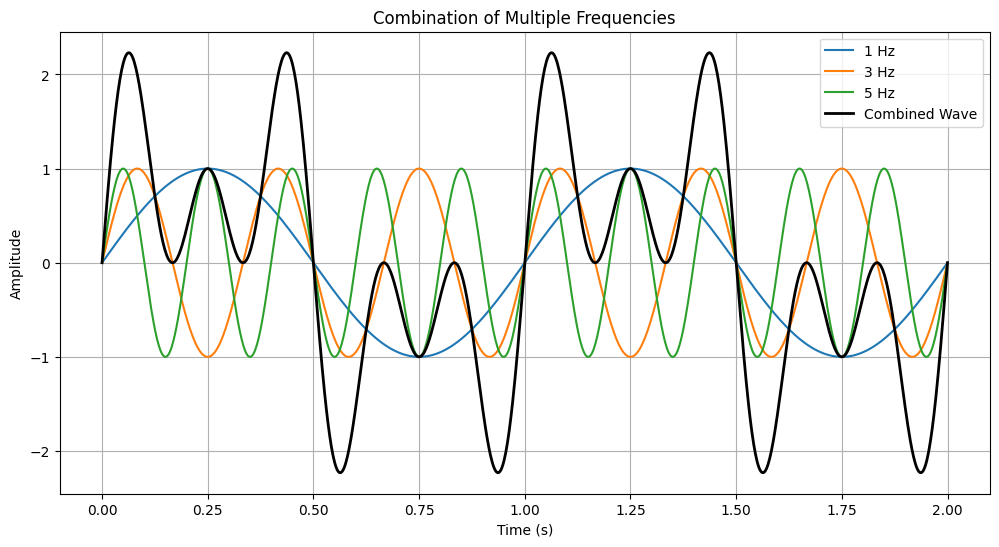

In [8]:

# Parameters
frequencies = [1, 3, 5]  # Multiple frequencies in Hz
time = np.linspace(0, 2, 1000)
combined_wave = np.zeros_like(time)

# Plot individual and combined waves
plt.figure(figsize=(12, 6))
for freq in frequencies:
    wave = np.sin(2 * np.pi * freq * time)
    plt.plot(time, wave, label=f'{freq} Hz')
    combined_wave += wave

# Plot combined wave
plt.plot(time, combined_wave, color='black', linewidth=2, label='Combined Wave')

# Formatting
plt.title('Combination of Multiple Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()



<br>

## Understanding Signals

Visualize your music player’s equalizer. Adjusting each knob enhances or suppresses specific frequencies, shaping the overall sound. The Fourier Transform accomplishes this mathematically: it reveals the extent to which each frequency contributes to the audio signal.


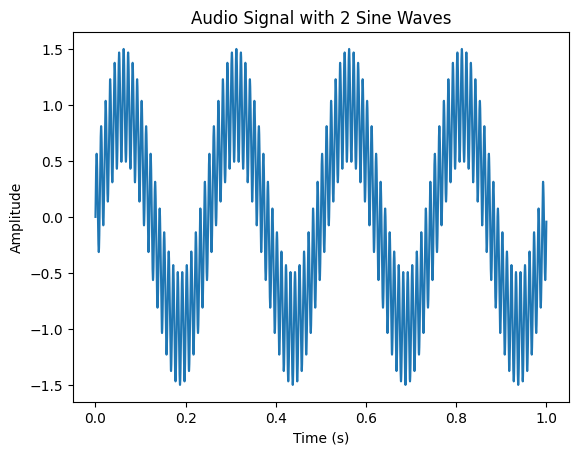

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate (samples per second)
fs = 8000  
t = np.arange(start=0,stop=1.0, step=1/fs)

# Mix two sine waves: 4 Hz (A4 note) and 100 Hz (A5 note)
# formula of wave, y = A sin(2*pi*f*t+phase)
audio_signal = np.sin(2*np.pi*4*t) + 0.5*np.sin(2*np.pi*100*t)
plt.plot(t, audio_signal)
plt.title("Audio Signal with 2 Sine Waves")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


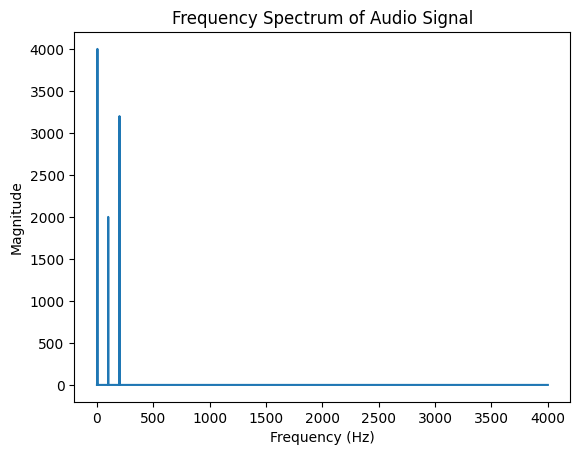

In [96]:

# With fourier transorm we convert, time domin to frequency domain:
# Compute the Fourier Transform
frequency_spectrum = np.fft.rfft(audio_signal)
frequencies = np.fft.rfftfreq(len(audio_signal), 1/fs)

# Plot the spectrum
plt.plot(frequencies, np.abs(frequency_spectrum))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Audio Signal")
plt.show()


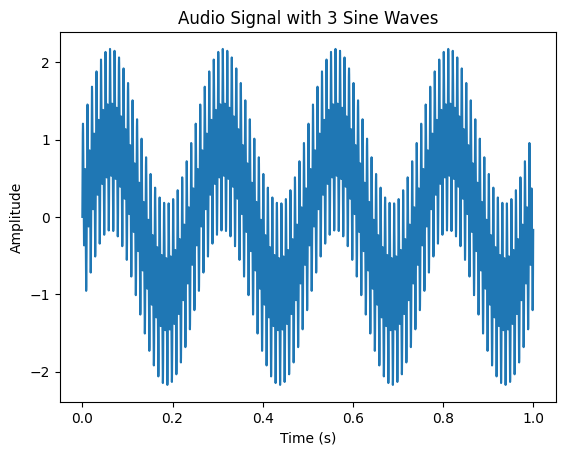

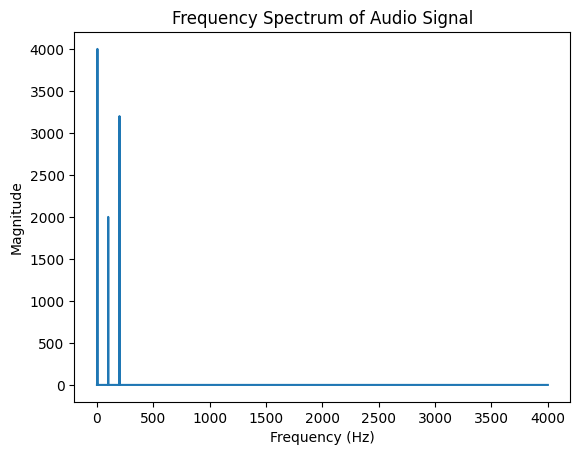

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate (samples per second)
fs = 8000  
t = np.arange(0, 1.0, 1/fs)

# Mix two sine waves: 4 Hz (A4 note) and 100 Hz.200hz (A5 note)
audio_signal = np.sin(2*np.pi*4*t) + 0.5*np.sin(2*np.pi*100*t)+ 0.8*np.sin(2*np.pi*200*t)
plt.plot(t, audio_signal)
plt.title("Audio Signal with 3 Sine Waves")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Compute the Fourier Transform
frequency_spectrum = np.fft.rfft(audio_signal)
frequencies = np.fft.rfftfreq(len(audio_signal), 1/fs)

# Plot the spectrum
plt.plot(frequencies, np.abs(frequency_spectrum))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Audio Signal")
plt.show()

In the above figure, This clearly shows peaks at 4HZ,200 Hz, and 400 Hz, indicating the original notes. I chose small frequencies to make the figures understandable, with others using the audio frequency in thousands.

<br>

# Fourier Transforms:
After we see how the Fourier Transform works and what the result is. let’s explain it simply and mathematically:

**Fourier Transforms:** <br>
Mathematically, the Fourier Transform converts a time-domain signal (a function of time) into a frequency-domain signal (a function of frequency). The Fourier Transform is defined as:

$F(\omega) = \int_{-\infty}^{\infty} f(t)\, e^{-j\omega t}\, dt$

**Here:**
- $\omega$ is the angular frequency ($\omega = 2\pi f$).
- $j$ is the imaginary unit ($j^2 = -1$).

<br>

# Inverse Fourier Transform:
The inverse Fourier Transform, which reconstructs the time-domain signal from its frequency-domain representation, is:
$f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega)\, e^{j\omega t}\, d\omega$

**Here:**
- $f(t)$ is the original time-domain signal.
- $F(\omega)$ is the frequency-domain representation.
- $\omega$ is the angular frequency ($\omega = 2\pi f$).
- $j$ is the imaginary unit ($j^2 = -1$).

Simply put, the Fourier Transform decomposes complex signals into simpler sinusoidal waves, each described by amplitude and phase.

<br>

# The Discrete Fourier Transform (DFT):
The Discrete Fourier Transform (DFT) is the digital equivalent of the Fourier Transform. Here is a step-by-step explanation of how the Discrete Fourier Transform (DFT) operates:

The Discrete Fourier Transform (DFT) formula is:

$X_k = \sum_{n=0}^{N-1} x_n \, e^{-j \frac{2\pi}{N} k n},
\quad k = 0, 1, 2, \ldots, N-1$

**Where:**
- $X_k$ : Frequency-domain representation.
- $x_n$ : Original time-domain (or spatial-domain) data.
- $N$ : Number of samples in the signal.
- $j$ : Imaginary unit, $j^2 = -1$.

FFT calculates this sum quickly using clever mathematical shortcuts.


### Example Signal
Let’s say you have a signal with $N$ values:

```text
x[0], x[1], x[2], ..., x[N-1]
```
You want to transform it into N frequency components. Here's how:

### Step 1: Start with the input signal
You have a list of **N** numbers.  
These could be:
- audio samples
- brightness values from an image row
- sensor readings, etc.

**Example:**
```python
x = [3, 1, 0, -1]  # N = 4
```

### Step 2: Loop through each frequency ( k )
For every frequency k  from 0 to (N-1), we calculate how much that frequency contributes to the signal.

We are building:
```python
X[0], X[1], . . ., X[N-1]  #the frequency domain result
```
These values together form the **frequency-domain representation**.


### Step 3: Apply the DFT formula

For each frequency ( k ), compute:
$X_k = \sum_{n=0}^{N-1} x[n] , e^{-j \frac{2\pi}{N} k n}$

**In simple words:**
* Multiply each signal value ( x[n] ) by a **rotating wave** (complex exponential).
* Add all these values together.
* The result tells you **how much frequency ( k )** exists in the signal.

**Calculation:**

$x = [3,1,0,-1], \quad N = 4$
DFT formula:
$X_k = \sum_{n=0}^{N-1} x[n]; e^{-j\frac{2\pi}{N}kn}$

here,
$e^{-j\frac{2\pi}{4}kn} = e^{-j\frac{\pi}{2}kn}$

## 🔹 (k = 0)
$X_0 = \sum_{n=0}^{3} x[n]; e^{-j0}$

cause, $(e^{-j0}=1)$
$X_0 = 3 + 1 + 0 - 1 = \boxed{3}$

## 🔹 (k = 1)
$X_1 = \sum_{n=0}^{3} x[n]; e^{-j\frac{\pi}{2}n}$
| n | (x[n]) | $(e^{-j\frac{\pi}{2}n})$ | Result |
| - | ------ | ---------------------- | ------ |
| 0 | 3      | (1)                    | (3)    |
| 1 | 1      | (-j)                   | (-j)   |
| 2 | 0      | (-1)                   | (0)    |
| 3 | -1     | (+j)                   | (-j)   |

$X_1 = 3 - j - j = \boxed{3 - 2j}$

## 🔹 (k = 2)
$X_2 = \sum_{n=0}^{3} x[n]; e^{-j\pi n}$

| n | (x[n]) | $(e^{-j\pi n})$ | Result |
| - | ------ | ------------- | ------ |
| 0 | 3      | (1)           | 3      |
| 1 | 1      | (-1)          | -1     |
| 2 | 0      | (1)           | 0      |
| 3 | -1     | (-1)          | 1      |

$X_2 = 3 - 1 + 0 + 1 = \boxed{3}$

## 🔹 (k = 3)
$X_3 = \sum_{n=0}^{3} x[n]; e^{-j\frac{3\pi}{2}n}$

| n | (x[n]) | $(e^{-j\frac{3\pi}{2}n})$ | Result |
| - | ------ | ----------------------- | ------ |
| 0 | 3      | (1)                     | 3      |
| 1 | 1      | (+j)                    | (+j)   |
| 2 | 0      | (-1)                    | 0      |
| 3 | -1     | (-j)                    | (+j)   |

$X_3 = 3 + j + j = \boxed{3 + 2j}$

Final Result:
$\boxed{
X = [3,3-2j,3,3+2j]
}$

### Step 4: Compute the magnitude (optional)
To see how strong each frequency is, compute the magnitude:

Magnitude formula:
$|a + bj| = \sqrt{a^2 + b^2}$

## 🔹 Step 4: Compute the magnitude

### (k = 0)
$X_0 = 3$
$|X_0| = |3| = \boxed{3}$

### (k = 1)
$X_1 = 3 - 2j$

$|X_1| = \sqrt{3^2 + (-2)^2}
= \sqrt{9 + 4}
= \sqrt{13}
\approx \boxed{3.61}$

### (k = 2)
$X_2 = 3$
$|X_2| = |3| = \boxed{3}$

### (k = 3)
$X_3 = 3 + 2j$

$|X_3| = \sqrt{3^2 + 2^2}
= \sqrt{13}
\approx \boxed{3.61}$

### Final Magnitude Spectrum

$\boxed{
|X| = [,3,; \sqrt{13},; 3,; \sqrt{13},]
}$

or numerically:

$\boxed{
|X| \approx [3,3.61,3,3.61]
}$



<br>

# Fast Fourier Transform (FFT)

The Fast Fourier Transform (FFT) is a computational algorithm used to quickly and efficiently compute the Discrete Fourier Transform (DFT) of a signal. The FFT transforms a time-domain signal (like audio) or a spatial-domain signal (like an image) into its constituent frequency components.

Why FFT?
- **Speed:** FFT significantly reduces computation time from O(N²) to O(Nlog⁡N), making it practical for large signals.
- **Efficiency:** Ideal for real-time analysis and digital signal processing.

# Python Libraries for FFT
The two most popular Python libraries for FFT calculations are. For simple analysis, NumPy suffices. For advanced signal processing or audio analysis tasks, SciPy provides extensive additional functionality.

### NumPy
- **Pros:** Fast, reliable, widely used.
- **Best for:** General-purpose signal analysis and straightforward use cases.
```python
import numpy as np 
fft_result = np.fft.fft(signal)
```

### SciPy
- **Pros:** Offers additional functions and signal-processing tools (filters, windowing, advanced features).
- **Best for:** More sophisticated analyses (e.g., filtering, spectrogram analysis).
```python
from scipy.fft import fft
fft_result = fft(signal)
```
<br>

# Magnitude vs. Phase:

When we perform a Fourier Transform (especially using FFT), the result is a series of complex numbers. Each of these contains two critical pieces of information:
- Magnitude: How strong each frequency component is.
- Phase: Where in its cycle (its alignment or offset) each wave starts.

Imagine an orchestra playing a symphony:
- Magnitude is like the volume of each instrument (how loud the flute or drum is).
- Phase is the timing — when each instrument begins playing.

Even if the instruments are at the right volume (magnitude), if they play out of sync (phase), the music sounds chaotic.

What Happens If You Remove One?
- Keep magnitude, discard phase: You keep the “ingredients” but lose the “recipe.” In images, this results in a blurry version. In audio, it loses clarity and intelligibility.
- Keep phase, discard magnitude: The result is often surprisingly recognizable in structure, but with distorted contrast or intensity.

<br>

# How to calculate the phase in Python:

The FFT returns complex numbers of the form:

$X(k)$ = a + jb 

Where, 
- a is real part 
- b imaginary part 
- j is imaginary unit $(j^2 = -1)$

The magnetitude is: 
$|X(k)| = \sqrt{a^2+b^2}$

The phase is:
$\theta_k = \tan^{-1}\!\left(\frac{b}{a}\right)$

- 0 radians (or 0°): The Peak of the wave aligns with time zero.
- π/2 radians (90°): Signal is delayed by a quarter cycle.
- π radians (180°): Signal is inverted.
- Phase Shift indicates the temporal alignment of each frequency.

This gives the angle (in radians) that the frequency component makes with the real axis. 


In [48]:
import numpy as np 

# Example signal:
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t)

# FFT: (A complex number)
fft_result = np.fft.fft(signal)

# phase calculation:(in radian)
phase = np.angle(fft_result)


print(fft_result[1])
real = fft_result[1].real
imaginary = fft_result[1].imag
#print(real,imaginary)
print(f"calculate angle: {np.arctan(imaginary/real)}")
print("phase with numpy:  ", phase[1],end="\n\n")

# Optional: unwrap phase to remove jumps
# or removes ±π discontinuities from phase to recover the true continuous phase.
phase_unwrapped = np.unwrap(phase)


# now calculate amplitude: 
amplitude_spectrum = np.abs(fft_result)
print("amplitude: {}".format(np.sqrt(real**2 + imaginary**2)))
print("amplitude with numpy: ",amplitude_spectrum[1])


# normalize:(optinal)
amplitude_spectrum = np.abs(fft_result) / len(signal)


(0.000653735635271227-0.20808983107271833j)
calculate angle: -1.5676547341413982
phase with numpy:   -1.5676547341413982

amplitude: 0.20809085795909746
amplitude with numpy:  0.20809085795909749


<br>

# Disadvantage of DFT And Introduction To STFT:

**Must Be Do coding every line it will build the intution:**

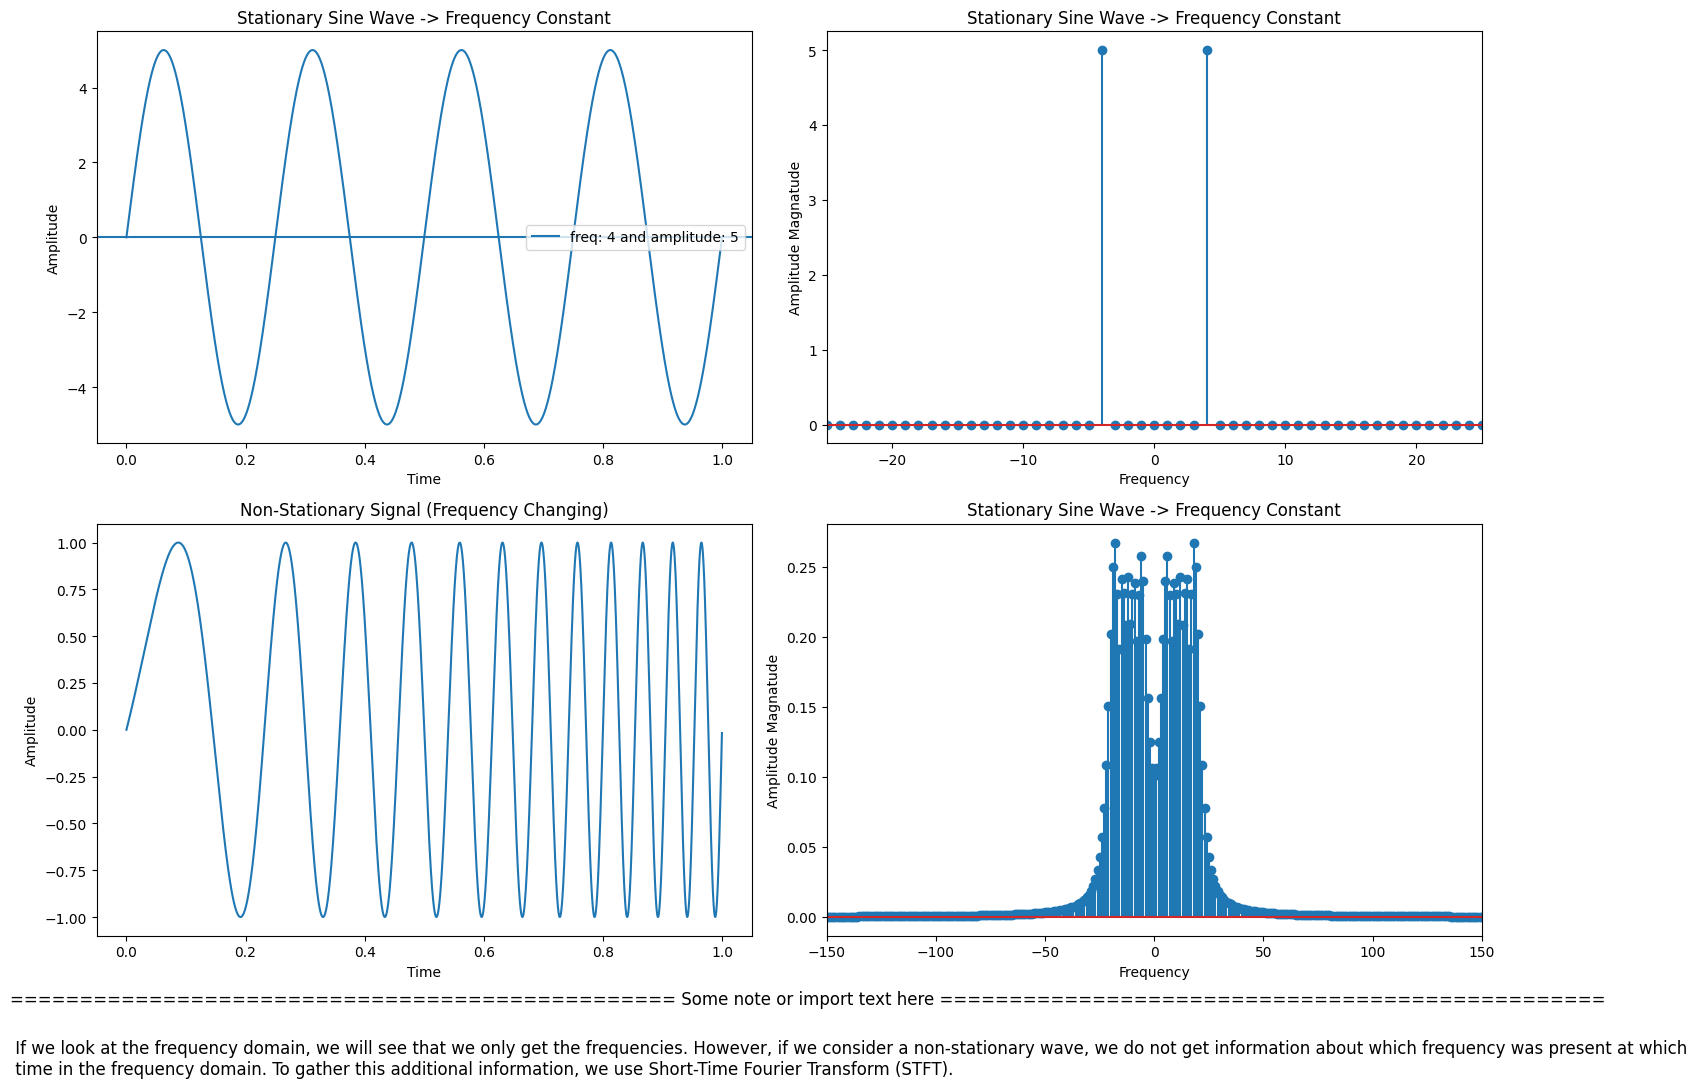

In [151]:

fx,ax = plt.subplots(2,2,figsize=(15,10))

# ========== 1. Make a Stationary Signal(Both Positive and Negative Amplitude) ============
frequency = 4
amplitude = 5 
phase = 0 

sampling_rate = 8000
time = np.arange(start=0,stop=1,step=1/sampling_rate)

y = amplitude*np.sin(2 * np.pi * frequency * time + phase )
ax[0][0].plot(time,y,label=f"freq: {frequency} and amplitude: {amplitude}")
ax[0][0].axhline(y=0,xmin=0,xmax=1)
ax[0][0].set_title("Stationary Sine Wave -> Frequency Constant")
ax[0][0].set_xlabel("Time")
ax[0][0].set_ylabel("Amplitude")
ax[0][0].legend()


# ================ 2. DFT OF Stationary Signal =============
D = np.fft.fft(y)#complex_number
# for DFT, amplitude increase, but our orginal amplitude is 5,
# our stationary signal is two sided, then our orginal_amplitude=2*normalize_amplitude
amplitude = np.abs(D)
normalize_amplitude = 2* amplitude/len(y)
sample_frequencies = np.fft.fftfreq(n=len(D),d=1/sampling_rate)
ax[0][1].stem(sample_frequencies,normalize_amplitude)
ax[0][1].set_xlim(-25,25)
ax[0][1].set_title("Stationary Sine Wave -> Frequency Constant")
ax[0][1].set_xlabel("Frequency")
ax[0][1].set_ylabel("Amplitude Magnatude")


# ========== 3. Make a Non- Stationary Signal ============
sampling_rate = 8000
time = np.arange(0, 1, 1/sampling_rate)


# frequency increases with time:
# in non-stationary time will change: 
frequency = 2 + 10 * time   
y = np.sin(2 * np.pi * frequency * time)
ax[1][0].plot(time, y,label="Non-Sationary Wave -> Frequnecy Variable")
ax[1][0].set_title("Non-Stationary Signal (Frequency Changing)")
ax[1][0].set_xlabel("Time")
ax[1][0].set_ylabel("Amplitude")


# ================ 4. DFT OF Stationary Signal =============
D = np.fft.fft(y)
amplitude = np.abs(D)
normalize_amplitude =  2* amplitude/len(y)
sample_frequencies = np.fft.fftfreq(n=len(D),d=1/sampling_rate)
ax[1][1].stem(sample_frequencies,normalize_amplitude)
ax[1][1].set_xlim(-150,150)
ax[1][1].set_title("Stationary Sine Wave -> Frequency Constant")
ax[1][1].set_xlabel("Frequency")
ax[1][1].set_ylabel("Amplitude Magnatude")

plt.figtext(0.0, -0.01, "================================================ Some note or import text here ================================================",fontsize=12)
plt.figtext(0.0, -0.08, """ If we look at the frequency domain, we will see that we only get the frequencies. However, if we consider a non-stationary wave, we do not get information about which frequency was present at which
 time in the frequency domain. To gather this additional information, we use Short-Time Fourier Transform (STFT).""",fontsize=12)

plt.tight_layout()
plt.show()




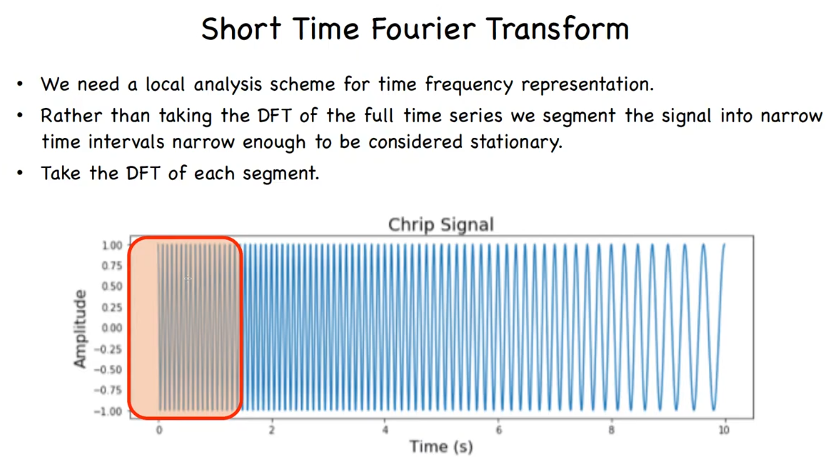

In [155]:
Image("../../img/img11.png")

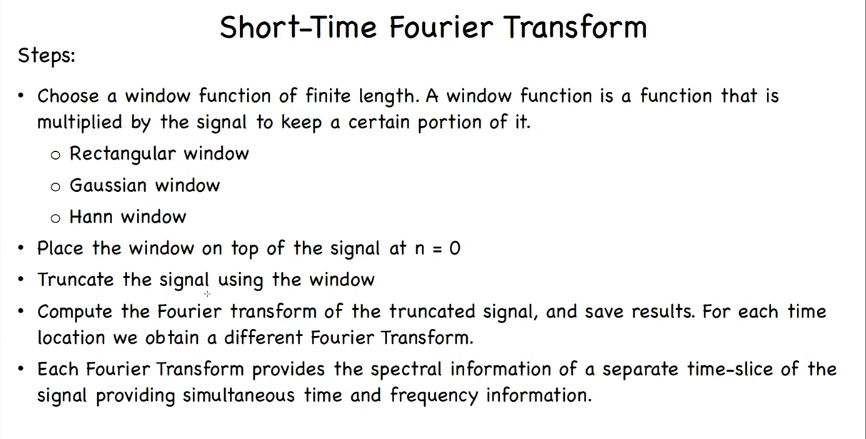

In [156]:
Image("../../img/img12.png")

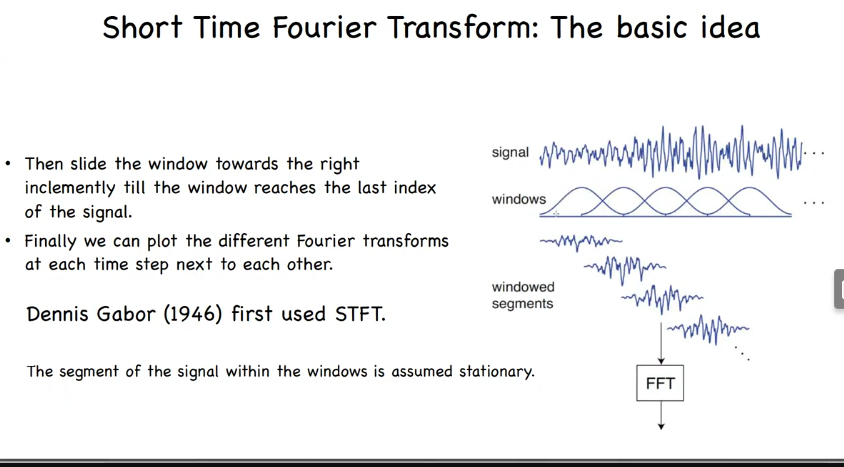

In [157]:
Image("../../img/img13.png")

 Effect of Window Function Shape: 
     - Rectangular windows: Output is not smooth, the loose of sharpness we call this lekage of energy.
     - Triangular windows: Reduce the lekage of energy
     - Hann Window: This is from a gaussian distribution. Almost smooth. 


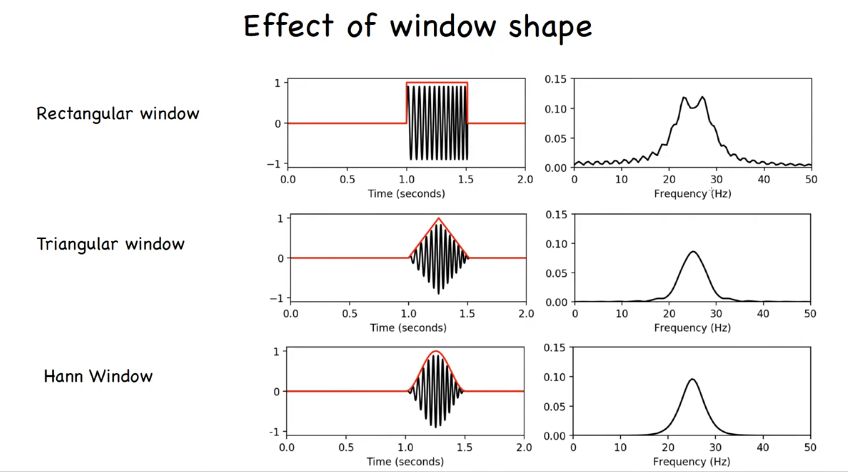

In [175]:

print(""" Effect of Window Function Shape: 
     - Rectangular windows: Output is not smooth, the loose of sharpness we call this lekage of energy.
     - Triangular windows: Reduce the lekage of energy
     - Hann Window: This is from a gaussian distribution. Almost smooth. """)
Image("../../img/img14.png")

Effect of windows shape: 
      - Here, we clearly seen that, our hann window concentrate energy in small region that's why we get better result than rectangular window
      


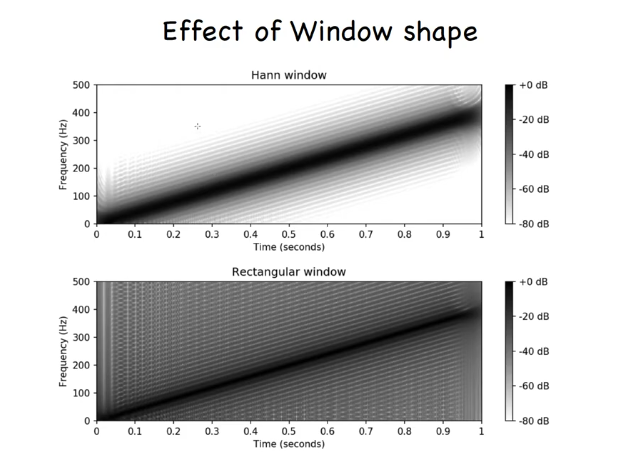

In [176]:
print("""Effect of windows shape: 
      - Here, we clearly seen that, our hann window concentrate energy in small region that's why we get better result than rectangular window
      """)
Image("../../img/img16.png")

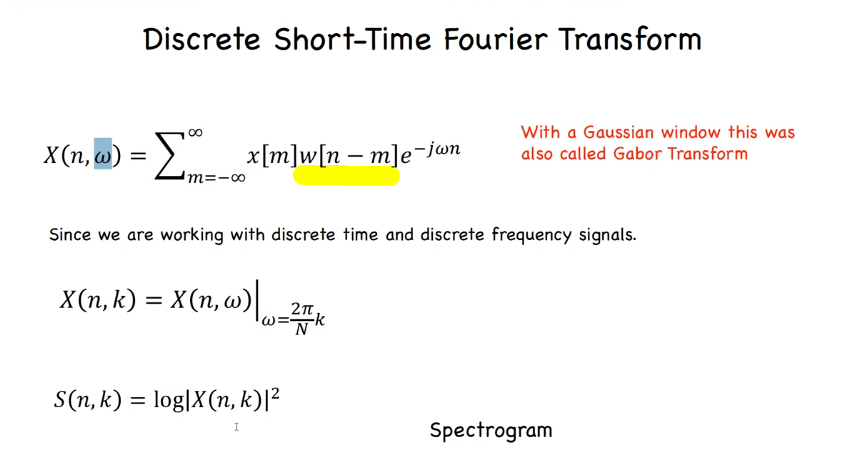

In [ ]:
Image("../../img/img15.png")


The given equation is:
$X(n, \omega) = \sum_{m=-\infty}^{\infty} x[m] w[n-m] e^{-j\omega n}$

**⚠️ Note:** There's a **common error** in this formula. The exponent should typically be $e^{-j\omega m}$ or $e^{-j\omega (n-m)}$ depending on convention, not $e^{-j\omega n}$.  
The standard correct form is:
$X(n, \omega) = \sum_{m=-\infty}^{\infty} x[m] w[n-m] e^{-j\omega m}$
This is because the Fourier transform is applied to the windowed signal segment at time n, and the complex exponential should depend on the sample index m, not the fixed time frame n.

### **Components:**
- **x[m]**: The discrete-time input signal.
- **w[n-m]**: A window function centered at time n.  
  - The window slides over the signal, selecting a local segment.
  - **Gaussian window**: w[m] = $e^{-\alpha m^2}$ — leads to the **Gabor Transform**.
- **$e^{-j\omega m}$**: Complex sinusoid at frequency $\omega$.
- **$X(n, \omega)$**: A 2D complex function representing **time-frequency content** at time n and frequency $\omega$.


### **Discrete Frequency Sampling**

Since computers work with discrete frequencies, we sample \(\omega\) at discrete points:
$X(n, k) = X(n, \omega) \bigg|_{\omega = \frac{2\pi}{N}k}$

Where:
- N: Number of frequency bins (usually FFT size).
- $k = 0, 1, 2, \dots, N-1$: Frequency bin index.
- $\omega_k = \frac{2\pi}{N}k$: Discrete frequency in radians/sample.
- **Relation to Hertz**: If sample rate is $f_s$, frequency in Hz is $f_k = \frac{k}{N} f_s$.
This means we compute STFT only at specific frequencies, making it suitable for FFT computation.


### **Spectrogram**
The spectrogram is a visual representation of the STFT magnitude squared:
$S(n, k) = \log |X(n, k)|^2$

- **$|X(n, k)|$**: Magnitude of STFT.
- **$|X(n, k)|^2$**: Power (energy) spectrogram.
- **$\log$**: Logarithm compresses dynamic range often in decibels: $10\log_{10}|X|^2$. <br>
**Why log scale?** Human perception of sound intensity is logarithmic; also helps visualize weak components.


### **Practical Implementation Steps**

| Parameter | Meaning | Typical Value |
|-----------|---------|---------------|
| `n_fft` / `nperseg` | FFT সাইজ | 256, 512, 1024, 2048 |
| `hop_length` / `noverlap` | উইন্ডো কতটা শিফট হবে | n_fft//2, n_fft//4 |
| `win_length` | উইন্ডোর দৈর্ঘ্য | সাধারণত n_fft এর সমান |
| `window` | উইন্ডো ফাংশন | 'hann', 'hamming', 'gaussian' |

Frequency_Resolution inversly propotional to Time_Resolution

**মনে রাখার কথা:** 
- `n_fft` ↑ = ফ্রিকোয়েন্সি রেজো ↑, টাইম রেজো ↓
- `hop_length` ↓ = টাইম রেজো ↑, কম্পিউটেশন ↑
- `window` = 'hann' (সবচেয়ে কমন)



Overlapiping: 
 Overlapping = (window_length - hop_size)


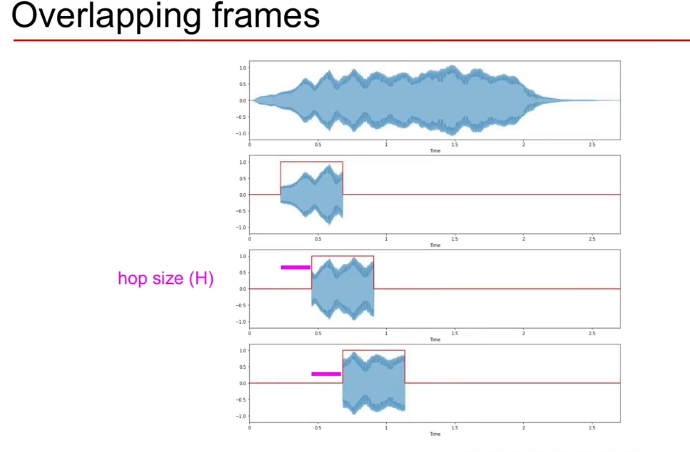

In [234]:
print("Overlapiping: \n Overlapping = (window_length - hop_size)")
Image("../../img/img17.png")

#### **Why is the dB scale negative in STFT Spectrogram?**

When we compute the spectrogram using `10 * log10(|Z|² + eps)`, we are implicitly setting **reference power = 1**.  
That means:
- If `|Z|² = 1` → `10*log10(1) = 0 dB`  
- If `|Z|² = 0.1` → `10*log10(0.1) = -10 dB`  
- If `|Z|² = 0.0000000001` → `10*log10(10⁻¹⁰) = -100 dB`  

**Conclusion:** The weaker the signal, the **more negative** the dB value.  
`-100 dB` here literally means **minus one hundred**, not "100 dB".  
It's completely normal for the colorbar to show values from 0 dB (maximum power) down to -100 dB (practically no signal).

<br>

(1025,) (17,)


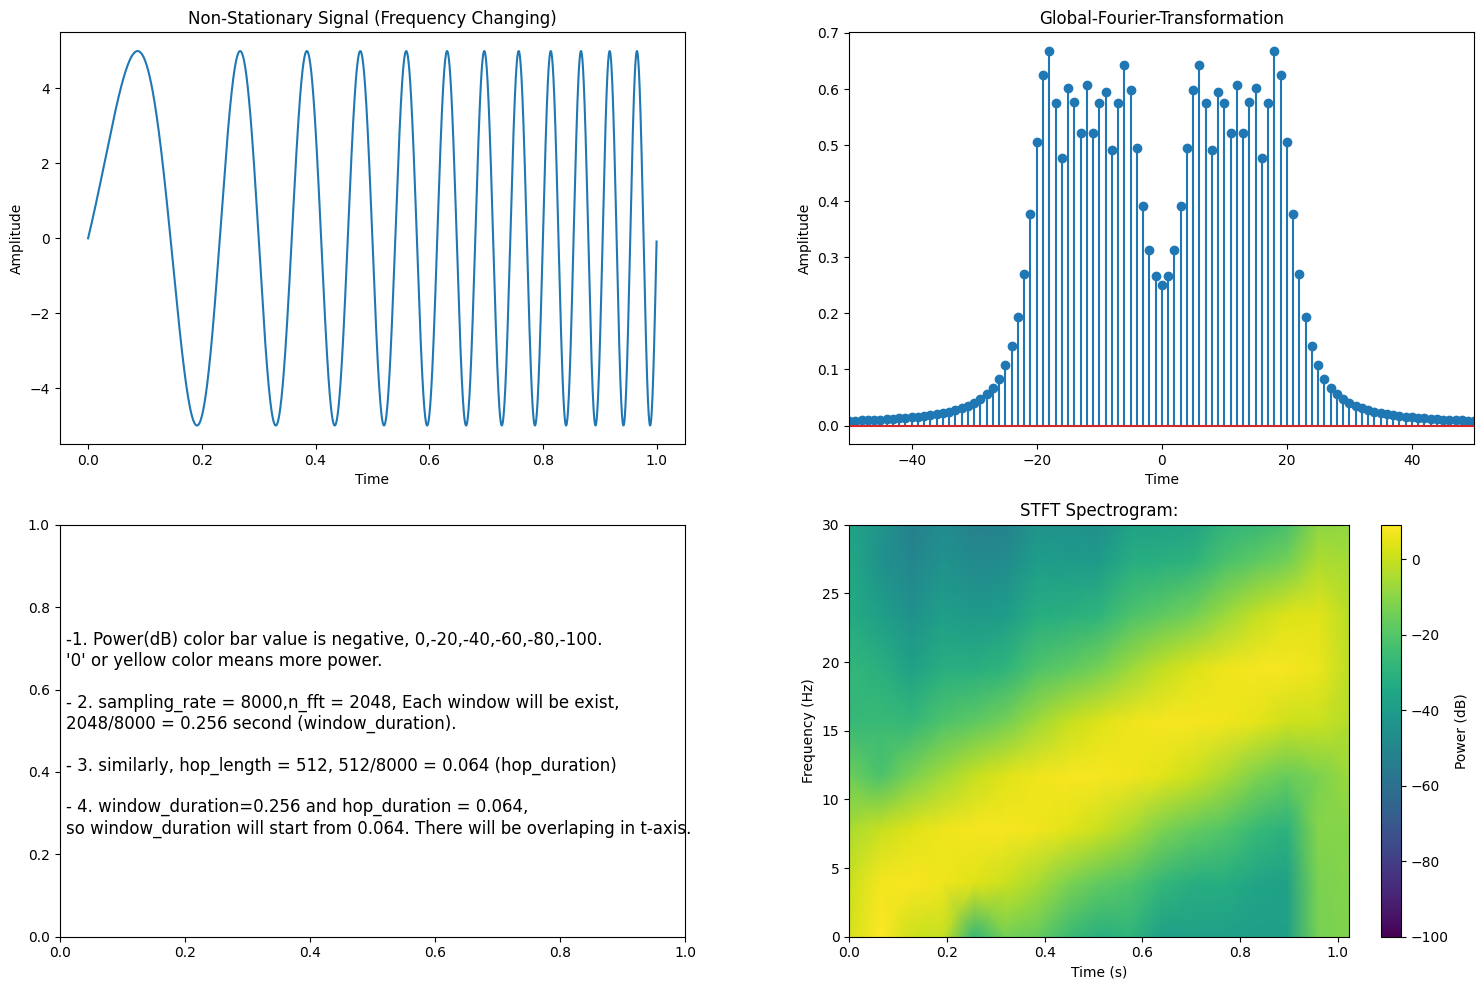

In [285]:
import numpy as np 
from scipy import signal
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# ========== 1. Make a Non- Stationary Signal ============
sampling_rate = 8000
amplitude = 5
time = np.arange(0, 1, 1/sampling_rate)

# frequency increases with time:
frequency = 2 + 10 * time   
y = amplitude*np.sin(2 * np.pi * frequency * time)
ax[0][0].plot(time, y)
ax[0][0].set_title("Non-Stationary Signal (Frequency Changing)")
ax[0][0].set_xlabel("Time")
ax[0][0].set_ylabel("Amplitude")


# ========== 2. Global Fourier Transformation ============
gobal_fourier = np.fft.fft(y)
sample_frequency = np.fft.fftfreq(len(gobal_fourier),d=1/sampling_rate)
amplitude = np.abs(gobal_fourier)
normalize_amplitude = amplitude/len(y)

ax[0][1].stem(sample_frequency, normalize_amplitude)
ax[0][1].set_title("Global-Fourier-Transformation")
ax[0][1].set_xlabel("Time")
ax[0][1].set_ylabel("Amplitude")
ax[0][1].set_xlim(-50,50)



# ============= 3. Short-Time-Fourier-Analysis =============  
n_fft = 2048
hop_length = 512
win_length = 2048
window = 'hann' 
eps = 1e-10


# Compute STFT
# Z[freq_index, time_index] = magnitude + j*phase
frequencies, times, Zxx = signal.stft(y, fs=sampling_rate, window=window, nperseg=win_length, noverlap=win_length - hop_length,
                 nfft=n_fft, padded=True, boundary='zeros', return_onesided=True)


# The value some value of Z is so large We need to convert it into Logarothirm Scale For better Visulization.
# Compute magnitude spectrogram (power)
# 10 * log10(|Z|²), eps=for avoding math error
mag_sq = np.abs(Zxx)**2
spectrogram_db = 10 * np.log10(mag_sq + eps)

print(frequencies.shape,times.shape)

# Plot spectrogram
im = ax[1][1].pcolormesh(times, frequencies, spectrogram_db, cmap='viridis',shading="gouraud")
ax[1][1].set_title("STFT Spectrogram:")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].set_ylabel("Frequency (Hz)")
ax[1][1].set_ylim(0, 30)
plt.colorbar(im, ax=ax[1][1], label='Power (dB)')


# ========= Some important Note About The Spectrogrm ==========
ax[1][0].text(x=0.01,y=0.2,fontsize=12,s="""-1. Power(dB) color bar value is negative, 0,-20,-40,-60,-80,-100. 
'0' or yellow color means more power.

- 2. sampling_rate = 8000,n_fft = 2048, Each window will be exist,
2048/8000 = 0.256 second (window_duration).

- 3. similarly, hop_length = 512, 512/8000 = 0.064 (hop_duration)

- 4. window_duration=0.256 and hop_duration = 0.064, 
so window_duration will start from 0.064. There will be overlaping in t-axis.
""")

# Adjust layout
plt.tight_layout()
plt.show()

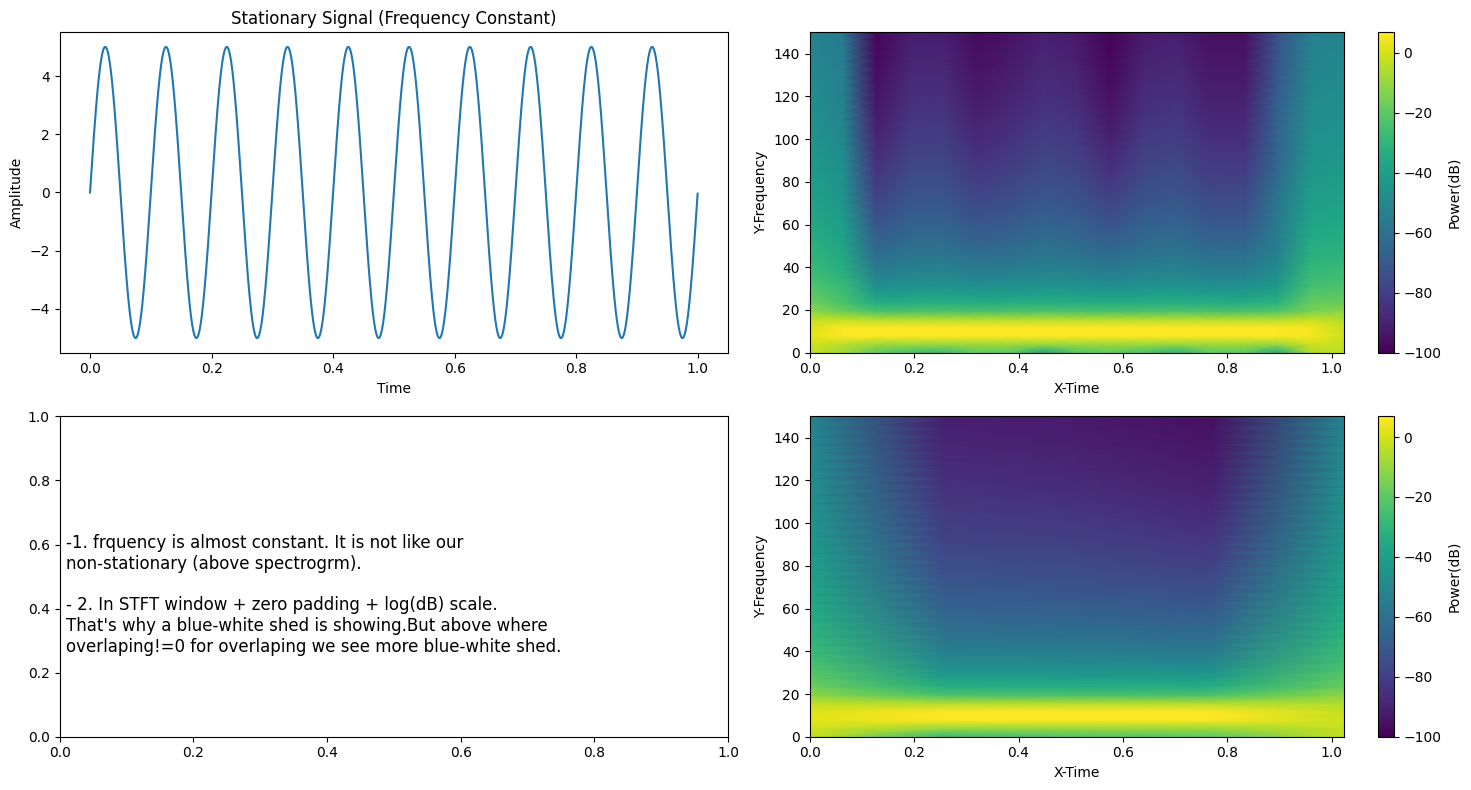

In [287]:

import numpy as np 
from scipy import signal
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(15, 8))


# ========== 1. Make a Stationary Signal ============
sampling_rate = 8000
amplitude = 5
frequency = 10
time = np.arange(0, 1, 1/sampling_rate)
y = amplitude*np.sin(2 * np.pi * frequency * time)


ax[0][0].plot(time, y)
ax[0][0].set_title("Stationary Signal (Frequency Constant)")
ax[0][0].set_xlabel("Time")
ax[0][0].set_ylabel("Amplitude")


# ========== 2. Short-Time-Fourier-Transformation of Stationary Signal ============
eps = 1e-10
hop_length = 512 
window_length = 2048
overlap = window_length-hop_length

# STFT-with Scipy
frequency, time, Zxx = signal.stft(x=y,fs=sampling_rate,nperseg=window_length,noverlap=overlap,boundary="zeros")
# conver Zxx into dB scale:
mag_sq = np.abs(Zxx)**2
spectrogram_db = 10 * np.log10(mag_sq+eps)
im = ax[0][1].pcolormesh(time,frequency,spectrogram_db,cmap='viridis',shading="gouraud")
ax[0][1].set_ylim(0,150)
plt.colorbar(im,ax=ax[0][1],label="Power(dB)")
ax[0][1].set_xlabel("X-Time")
ax[0][1].set_ylabel("Y-Frequency")



# ========== 3. Short-Time-Fourier-Transformation of Stationary Signal (hop_length = window_length) ============
# overlap = 0 
eps = 1e-10
hop_length = 2048 
window_length = 2048
overlap = window_length-hop_length

# STFT-with Scipy
frequency, time, Zxx = signal.stft(x=y,fs=sampling_rate,nperseg=window_length,noverlap=overlap,boundary="zeros")
# conver Zxx into dB scale:
mag_sq = np.abs(Zxx)**2
spectrogram_db = 10 * np.log10(mag_sq+eps)
im = ax[1][1].pcolormesh(time,frequency,spectrogram_db,cmap='viridis',shading="gouraud")
ax[1][1].set_ylim(0,150)
plt.colorbar(im,ax=ax[1][1],label="Power(dB)")
ax[1][1].set_xlabel("X-Time")
ax[1][1].set_ylabel("Y-Frequency")


# ========= Some important Note About The Spectrogrm ==========
ax[1][0].text(x=0.01,y=0.2,fontsize=12,s="""-1. frquency is almost constant. It is not like our 
non-stationary (above spectrogrm).

- 2. In STFT window + zero padding + log(dB) scale. 
That's why a blue-white shed is showing.But above where 
overlaping!=0 for overlaping we see more blue-white shed.
""")
plt.tight_layout()
plt.show()



<br>

# From Spectrum to Spectrogram:
When analyzing audio signals, we often want to know what frequencies are present. That’s where the spectrum comes in; it’s like a snapshot of the sound’s frequency content at a specific moment in time.

But sound is not static. Speech, music, and everyday noises change constantly over time. That’s where the spectrogram becomes invaluable.

**What’s the Difference?**
**Spectrum** is like taking a photo:
- Imagine strumming a single chord on a guitar and freezing that moment. The spectrum tells you which notes (frequencies) are present, and how strong each one is.
- Great for analyzing a short, steady sound. But it tells you nothing about how the sound changes next.

**A spectrogram is like a movie:**
- Now, imagine a full guitar solo. The notes change rapidly — some fade, others appear. A spectrogram tracks the evolution of frequency content. Perfect for speech, music, and environmental sounds where timing matters.

**How Does a Spectrogram Work?**
Instead of doing one big FFT on the whole signal:
- 1. We split the audio into short windows (e.g., 20–40 milliseconds).
- 2. We perform FFT on each window.
- 3. We stack the results side by side, forming a 2D image.

The result is a spectrogram:
- X-axis → Time
- Y-axis → Frequency
- Color → Amplitude (loudness)

This gives us a complete time–frequency map of the signal.
Why It’s Gold for ML?

Most audio ML models (like speech recognition, music tagging, sound classification) don’t use raw waveforms.
Instead, they use spectrograms — because they capture both:
- What the signal contains (frequencies)
- When those sounds occur (timing)

It’s like giving your ML model a piano roll instead of just a sound wave — it’s far more structured and informative.

**Summmary:** 

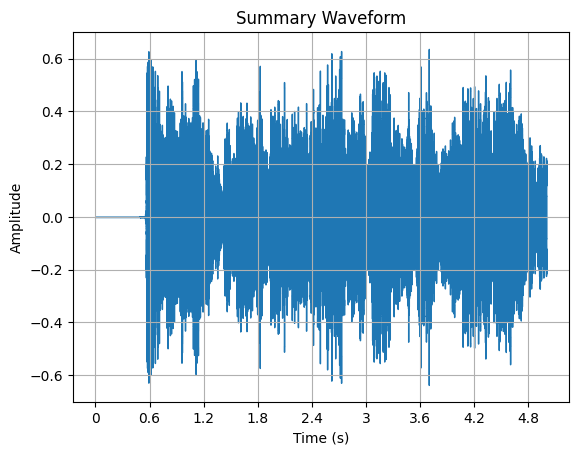

Result After Doing STFT(Short-Time-Fourier-Transormation)
shape:  (1025, 216)  type:  <class 'numpy.ndarray'>


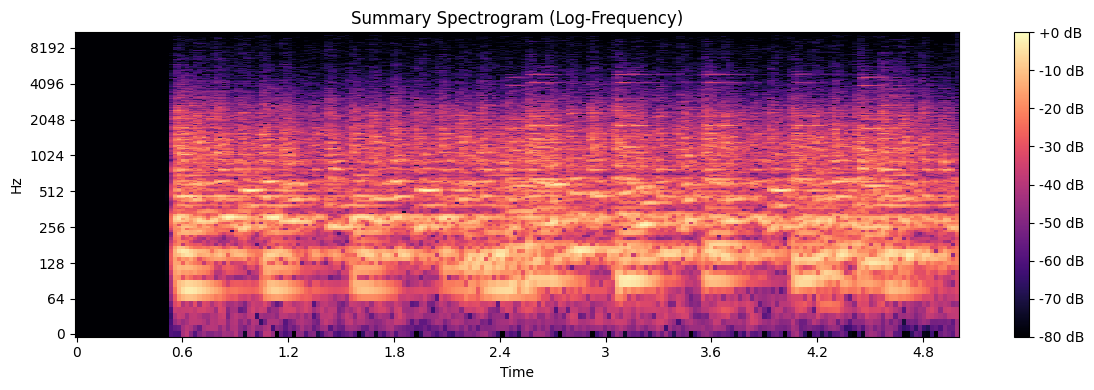

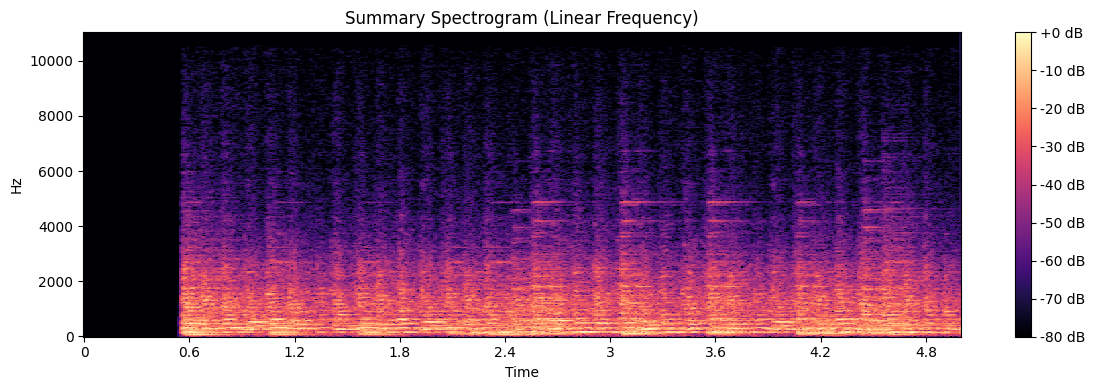

In [60]:
import librosa 
import librosa.display as display 
import numpy as np 
import matplotlib.pyplot as plt 

y,sr = librosa.load('sound.mp3',duration=5)

# 1. wavefrom of the audio ploting
display.waveshow(y=y,sr=sr)
plt.title("Summary Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#2. Specturn using STFT(Short Time Fourier Transformation)->(Log-Scale): 
plt.figure(figsize=(12,4))
stft = librosa.stft(y) 
print("Result After Doing STFT(Short-Time-Fourier-Transormation)")
print("shape: ",stft.shape," type: ",type(stft))
amplitude = np.abs(stft)
D = librosa.amplitude_to_db(S=amplitude,ref=np.max)
librosa.display.specshow(data=D,sr=sr,x_axis="time",y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Summary Spectrogram (Log-Frequency)")
plt.tight_layout()
plt.show()


# 3. Spectrogram (Linear Frequency)
S = librosa.stft(y, n_fft=1024, hop_length=256)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='hz')
plt.title("Summary Spectrogram (Linear Frequency)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()



- Waveform: Time-domain view of the audio.
- Log-Frequency Spectrogram: Better for human hearing (like a piano keyboard).
- Linear-Frequency Spectrogram: Good for machine perception or raw analysis.

<br>